In [ ]:
# aim: https://doi.org/10.1016/j.ijid.2020.05.080
# method: logistic regression
# done: ROC curve

# todo: imputation?  bias correction??

# version: v0.1 - 2020.10.27
# author: jimmymall at 163 dot com
# for: Zhan Junwei


# Explore the data

In [1]:
#
library(aod)
library(ggplot2)
mydata <- read.csv("binary.csv")

#探索数据
head(mydata) #数据Y是录取admit，其他3个是自变量

Warning message:
"package 'aod' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"


,admit,gre,gpa,rank
,<int>,<int>,<dbl>,<int>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [2]:
summary(mydata)
sapply(mydata,sd)

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

admit         gre         gpa        rank 
  0.4660867 115.5165364   0.3805668   0.9444602

In [3]:
## two-way contingency table of categorical outcome and predictors we want
## to make sure there are not 0 cells
xtabs(~admit+rank, data=mydata)
str(mydata)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


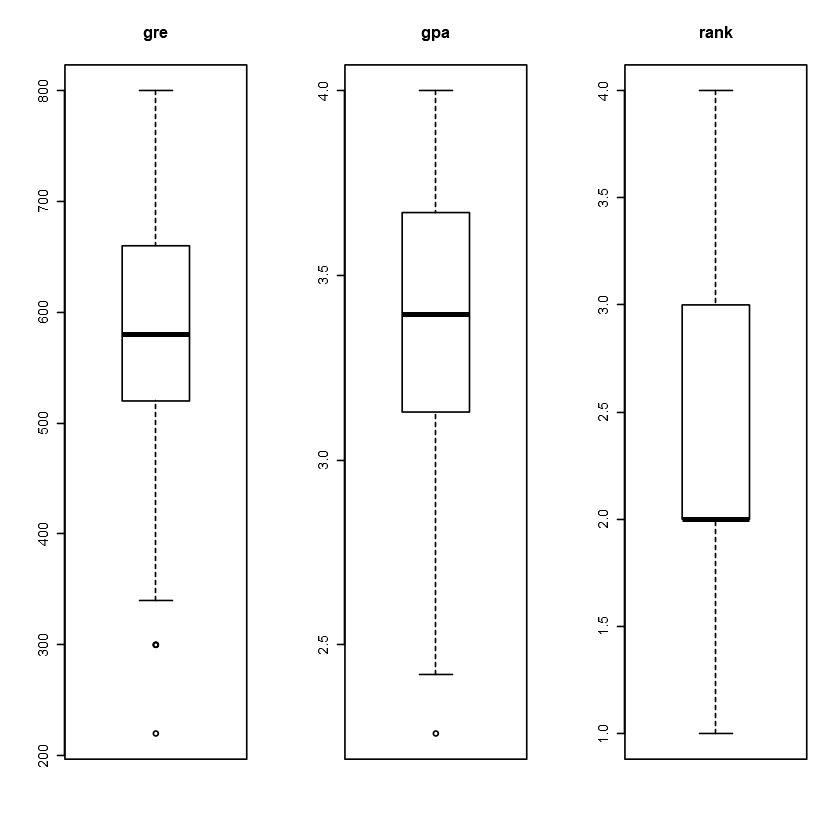

In [4]:
par(mfrow=c(1,3)) 
for(i in 2:4){
  boxplot(mydata[,i],main=colnames(mydata)[i])
}

In [5]:
#把category变成分类变量
mydata$rank <- factor(mydata$rank)
str(mydata)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : Factor w/ 4 levels "1","2","3","4": 3 3 1 4 4 2 1 2 3 2 ...


## 缺失数据的处理 imputation

In [ ]:
# P71，右上，Data procession:
# multiple imputation?

## bias correction:Bootstrapping

In [ ]:
# P71，右上，model development
# Bootstrapping?

# Logistic Regression

In [6]:
mylogit <- glm(admit ~ gre + gpa + rank, data = mydata, family = "binomial")
summary(mylogit)


Call:
glm(formula = admit ~ gre + gpa + rank, family = "binomial", 
    data = mydata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6268  -0.8662  -0.6388   1.1490   2.0790  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.989979   1.139951  -3.500 0.000465 ***
gre          0.002264   0.001094   2.070 0.038465 *  
gpa          0.804038   0.331819   2.423 0.015388 *  
rank2       -0.675443   0.316490  -2.134 0.032829 *  
rank3       -1.340204   0.345306  -3.881 0.000104 ***
rank4       -1.551464   0.417832  -3.713 0.000205 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 499.98  on 399  degrees of freedom
Residual deviance: 458.52  on 394  degrees of freedom
AIC: 470.52

Number of Fisher Scoring iterations: 4


In [7]:
## CIs using profiled log-likelihood, 95%
confint(mylogit)

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),-6.2716202334,-1.792547080
gre,0.0001375921,0.004435874
gpa,0.1602959439,1.464142727
rank2,-1.3008888002,-0.056745722
rank3,-2.0276713127,-0.670372346
rank4,-2.4000265384,-0.753542605


In [8]:
## CIs using standard errors
confint.default(mylogit)

,2.5 %,97.5 %
(Intercept),-6.2242418514,-1.755716295
gre,0.0001202298,0.004408622
gpa,0.1536836760,1.454391423
rank2,-1.2957512650,-0.055134591
rank3,-2.0169920597,-0.663415773
rank4,-2.3703986294,-0.732528724


In [9]:
## odds ratios and 95% CI
exp(cbind(OR = coef(mylogit), confint(mylogit)))

Waiting for profiling to be done...



,OR,2.5 %,97.5 %
(Intercept),0.0185001,0.001889165,0.1665354
gre,1.0022670,1.000137602,1.0044457
gpa,2.2345448,1.173858216,4.3238349
rank2,0.5089310,0.272289674,0.9448343
rank3,0.2617923,0.131641717,0.5115181
rank4,0.2119375,0.090715546,0.4706961


# Nomogram

In [10]:
library(rms)

## 按照nomogram要求“打包”数据，绘制nomogram的关键步骤,??datadist查看详细说明
ddist <- datadist(mydata)
options(datadist="ddist") 

Warning message:
"package 'rms' was built under R version 3.6.3"
Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 3.6.3"
Loading required package: lattice

Loading required package: survival


Attaching package: 'survival'


The following object is masked from 'package:aod':

    rats


Loading required package: Formula


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units


Loading required package: SparseM

Warning message:
"package 'SparseM' was built under R version 3.6.2"

Attaching package: 'SparseM'


The following object is masked from 'package:base':

    backsolve




In [11]:
## 构建logisitc回归模型
mod <- lrm(admit ~ gre + gpa + rank, data = mydata)
#mod <- glm(admit ~ gre + gpa + rank,family=binomial(link = "logit"),data = mydata) 
mod

Logistic Regression Model
 
 lrm(formula = admit ~ gre + gpa + rank, data = mydata)
 
                       Model Likelihood     Discrimination    Rank Discrim.    
                          Ratio Test           Indexes           Indexes       
 Obs           400    LR chi2      41.46    R2       0.138    C       0.693    
  0            273    d.f.             5    g        0.838    Dxy     0.386    
  1            127    Pr(> chi2) <0.0001    gr       2.311    gamma   0.386    
 max |deriv| 2e-06                          gp       0.167    tau-a   0.168    
                                            Brier    0.195                     
 
           Coef    S.E.   Wald Z Pr(>|Z|)
 Intercept -3.9900 1.1400 -3.50  0.0005  
 gre        0.0023 0.0011  2.07  0.0385  
 gpa        0.8040 0.3318  2.42  0.0154  
 rank=2    -0.6754 0.3165 -2.13  0.0328  
 rank=3    -1.3402 0.3453 -3.88  0.0001  
 rank=4    -1.5515 0.4178 -3.71  0.0002  
 

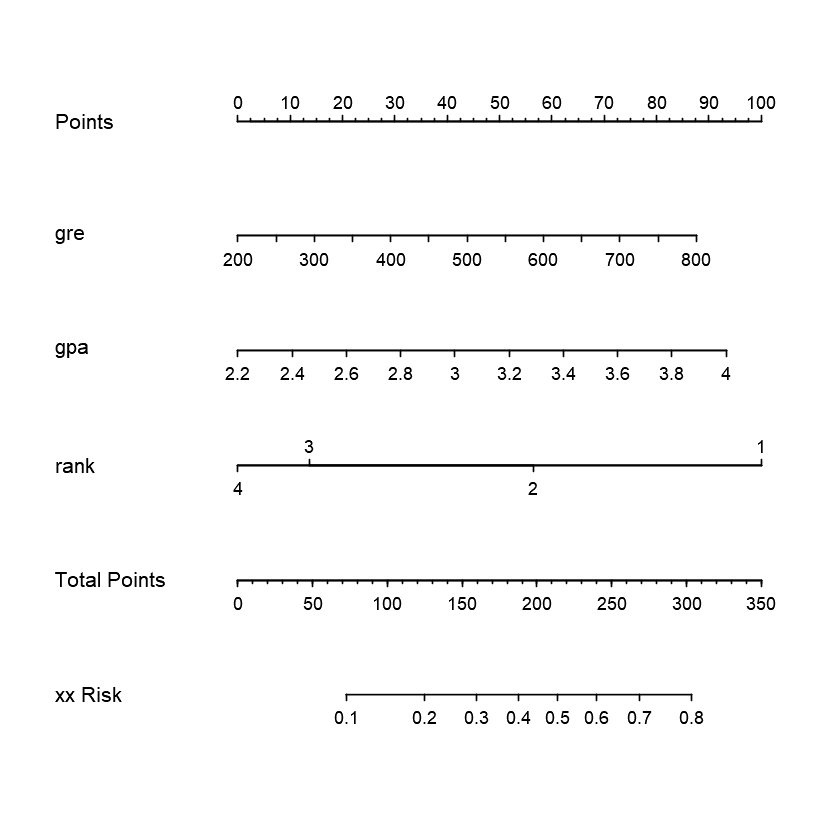

In [12]:
nom <- nomogram(mod, fun= function(x)1/(1+exp(-x)), # or fun=plogis
                lp=F, funlabel="xx Risk")
plot(nom)

## nomogram图的修饰

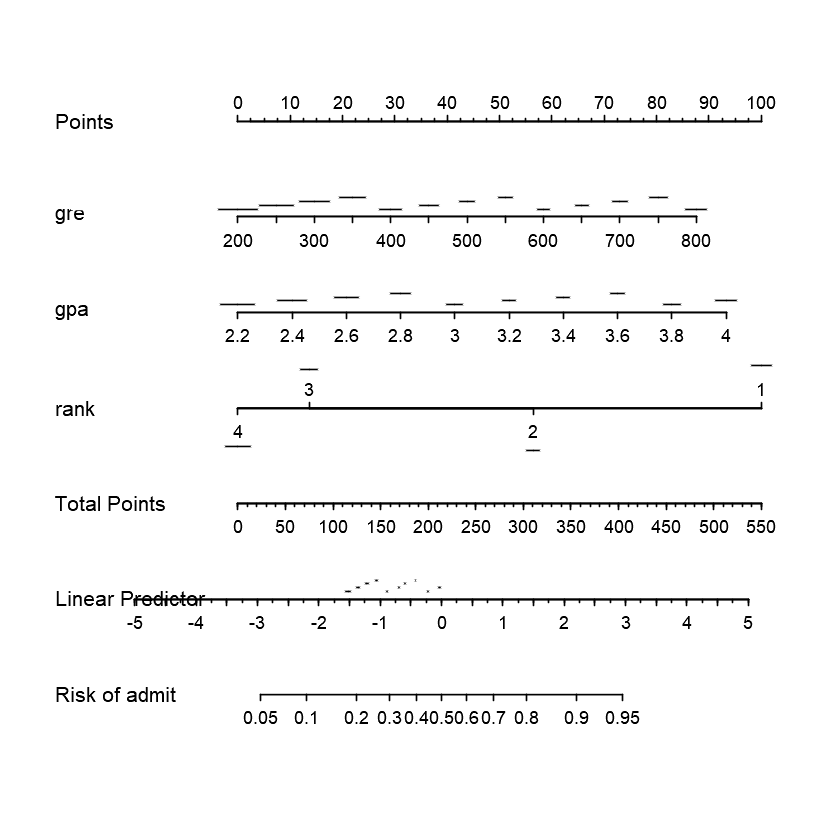

In [13]:
## 绘制logisitc回归的风险预测值的nomogram图
nom <- nomogram(mod,
                lp=T,
                lp.at = seq(-5,5,by=0.5),
                fun=function(x) 1/(1+exp(-x)),
                funlabel = 'Risk of admit',
                fun.at = c(0.05,seq(0.1,0.9,by=0.1),0.95),
                conf.int = c(0.1,0.7))
plot(nom)

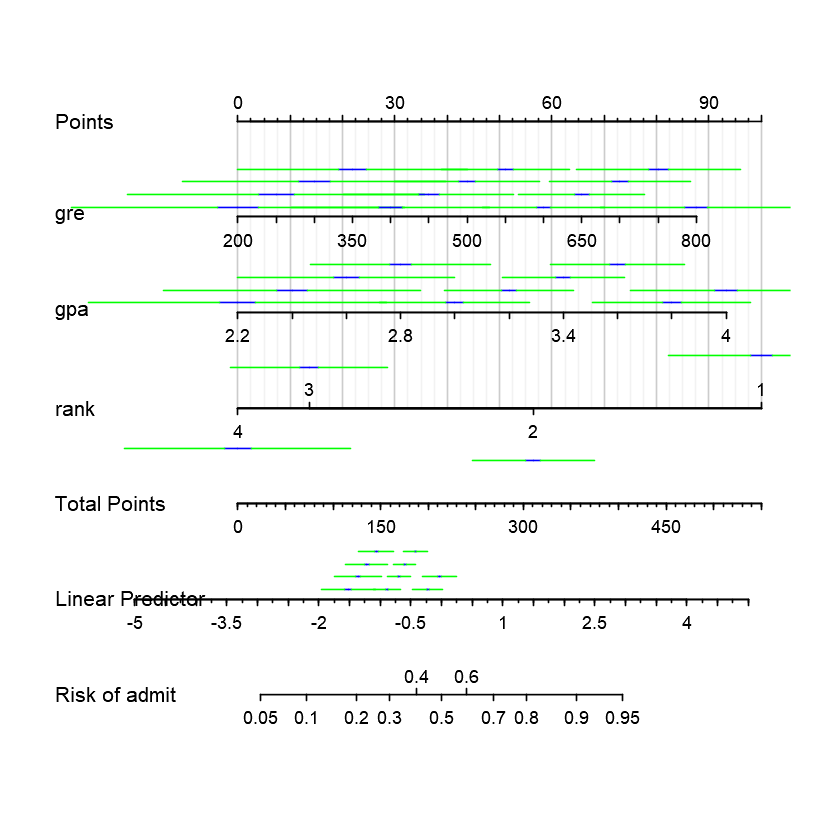

In [14]:
plot(nom,
     lplabel = 'Linear Predictor',
     fun.side = c(1,1,1,1,3,1,3,1,1,1,1),
     label.every = 3,
     col.conf = c('blue','green'),
     conf.space = c(0.1,0.5),
     col.grid = gray(c(0.8,0.95)),
     which='shock')

## 效果评价: Bootstrap C-index

In [ ]:
# https://www.jianshu.com/p/2180b28883ff

# 可采用Bootstrap自抽样法，利用建模自身的数据来验证模型的预测效果。
# Bootstrap自抽样法是指对样本人群进行有放回的重复抽样，每次抽样样本数相同，
# 这样同一个个体就有可能被抽中多次。利用Bootstrap自抽样产生的新样本去评价列线图模型的准确性，
# 常用C-统计量来进行衡量，其值越接近于1说明列线图的预测能力越准确。




# ROC curve

In [15]:
# 用trainning数据集验证
newData0=mydata
newData0$pred=predict(mylogit, newdata = newData0[,2:4], type = "response")
head(newData0)

,admit,gre,gpa,rank,pred
,<int>,<int>,<dbl>,<fct>,<dbl>
1,0,380,3.61,3,0.1726265
2,1,660,3.67,3,0.2921750
3,1,800,4.00,1,0.7384082
4,1,640,3.19,4,0.1783846
5,0,520,2.93,4,0.1183539
6,1,760,3.00,2,0.3699699


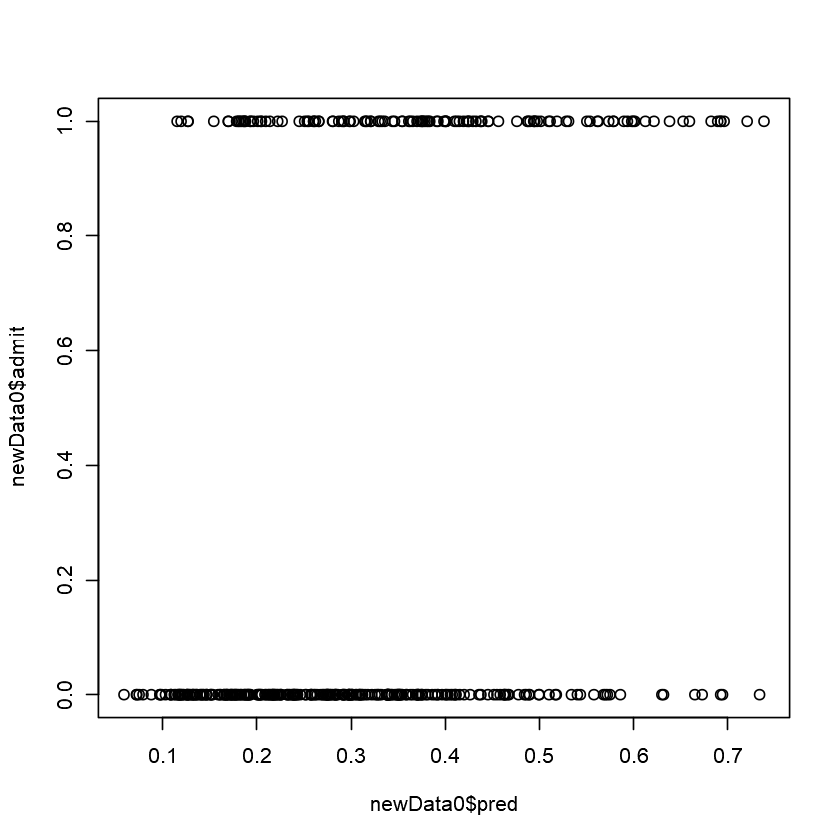

In [16]:
plot( newData0$pred, newData0$admit )

## 定义法

In [17]:
set1=newData0$pred
length(set1) #400
min(set1) #0.0587864283332191
max(set1) #0.738408245980191
stepNumber=1000
step=(0.738408245980191-0.0587864283332191)/stepNumber; step

[1] 400

[1] 0.05878643

[1] 0.7384082

[1] 0.0006796218

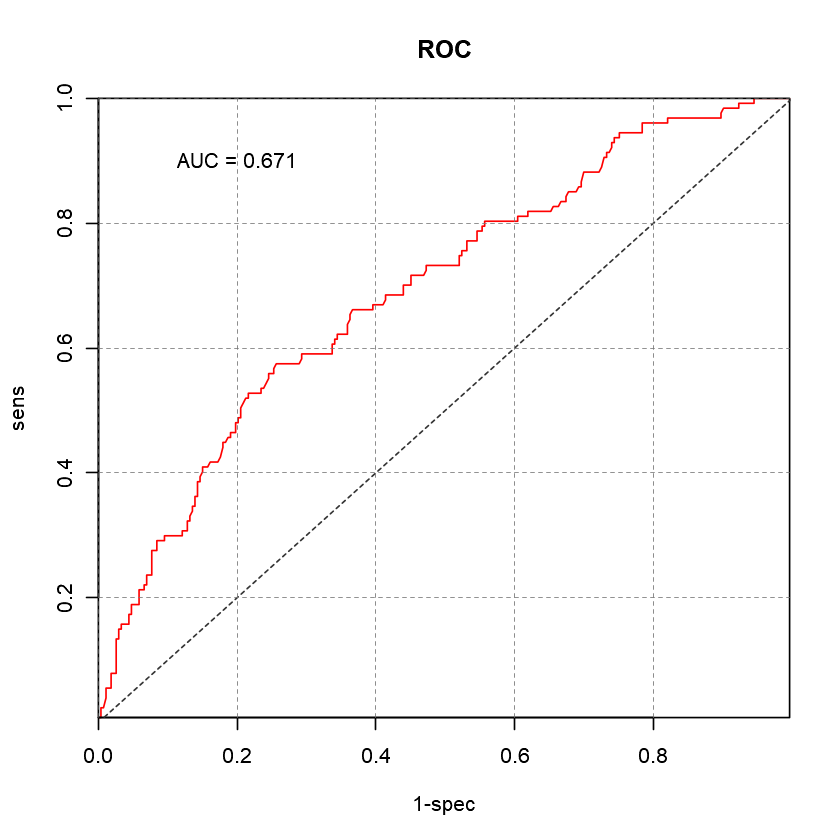

In [18]:
sensArr=c()
specArr=c()

for(i in 0: (stepNumber-1) ){
    threshold=min(set1+step*i)
    tmp=newData0$pred>threshold
    tb=table(tmp, newData0$admit)
    #
    sens=tb[4]/(tb[3]+tb[4])
    spec=tb[1]/(tb[1]+tb[2])
    #
    sensArr=c(sensArr, sens)
    specArr=c(specArr, spec)
}
# auc
auc0=1-sum(sensArr*step)


# plot
plot(1-specArr, sensArr, lty=1, type='l', col='red',
    xlab="1-spec", ylab="sens",main="ROC", 
    xaxs ='i',yaxs ='i')
lines( c(0,1), c(0,1), lty=2, col="#333333",lwd=1)
abline(h=seq(0,1,0.2), lty=2, col="#777777",lwd=0.5) #三条red虚横线，宽度是一半
abline(v=seq(0,1,0.2), lty=2, col="#777777",lwd=0.5)
text(0.2,0.9, paste0('AUC = ', round(auc0, 3) ))

## ROCR包

Warning message:
"package 'ROCR' was built under R version 3.6.3"


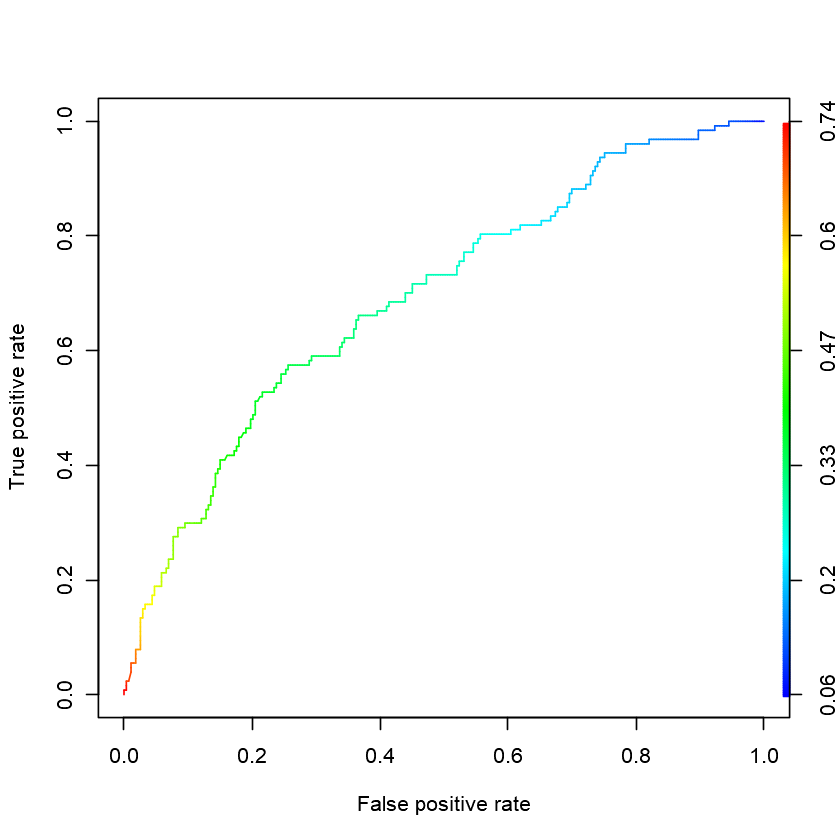

In [19]:
# http://blog.sina.com.cn/s/blog_676d6a990102wbiy.html
# https://blog.csdn.net/qq_16365849/article/details/52702412

#install.packages("ROCR")
library('ROCR')

predObj <- prediction(newData0$pred, newData0$admit)
perf <- performance(predObj,"tpr","fpr")
plot(perf,colorize=TRUE)

## pROC包

In [124]:
# install.packages("pROC")

Warning message:
"package 'pROC' was built under R version 3.6.3"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.6928

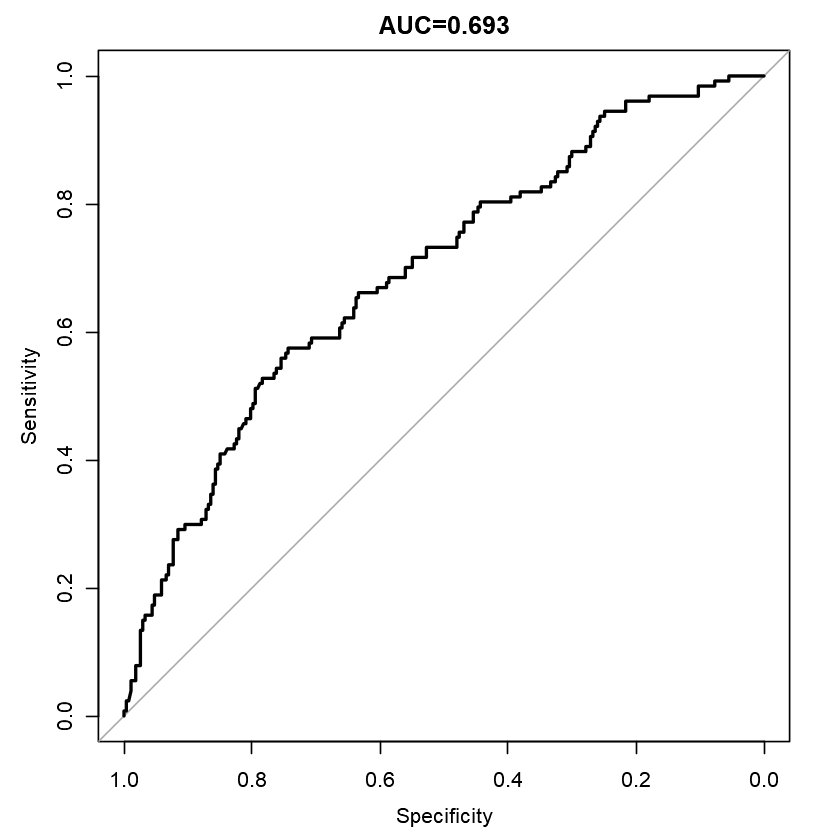

In [20]:
library(pROC)
#data(aSAH)

roc1=roc(newData0$admit, newData0$pred, legacy.axes=T)
auc1=auc(roc1); auc1
plot(roc1, main=paste0("AUC=",round(auc1,3) ) )

# predict 预测

In [21]:
#造一批数据
newdata1 <- with(mydata, data.frame(gre = mean(gre), gpa = mean(gpa), rank = factor(1:4)))
## view data frame
newdata1

gre,gpa,rank
<dbl>,<dbl>,<fct>
587.7,3.3899,1
587.7,3.3899,2
587.7,3.3899,3
587.7,3.3899,4


In [22]:
#做预测
#that the type of prediction is a predicted probability (type="response").
newdata1$rankP <- predict(mylogit, newdata = newdata1, type = "response")
newdata1

gre,gpa,rank,rankP
<dbl>,<dbl>,<fct>,<dbl>
587.7,3.3899,1,0.5166016
587.7,3.3899,2,0.3522846
587.7,3.3899,3,0.2186120
587.7,3.3899,4,0.1846684


# refer

In [ ]:
# https://blog.csdn.net/sunflower_sara/article/details/81055898